### Logistic regression
This file contains code that helps you get started on 
logistic regression. You will need to complete the functions 
in logistic_regressor.py and utils.py in the places indicated.

In [1]:
import pandas as pd
import numpy as np
import utils
from logistic_regressor import LogisticRegressor

### Unregularized logistic regression

Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...


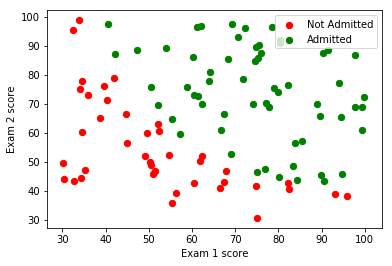

In [6]:
##================ Part 0: Reading data and plotting ==================#

data = pd.read_csv('ex1data1.txt')
X = np.vstack([data.x1,data.x2]).T
y = data.y

import matplotlib.pyplot as plt
import plot_utils

print 'Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...'
plot_utils.plot_twoclass_data(X,y,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
plt.show()
#plt.savefig('fig1.pdf')

In [3]:
##================ Part 1: Compute cost and gradient ==================#
# open logistic_regressor.py and implement loss and gradient of loss 

# set up the X matrix with the column of ones as intercept

XX = np.vstack([np.ones((X.shape[0],)),X.T]).T

# set up a logistic regression model

log_reg1 = LogisticRegressor()

# test the loss and gradient function

theta = np.zeros((XX.shape[1],))
loss = log_reg1.loss(theta,XX,y)
print "Loss on all-zeros theta vector (should be around 0.693) = ", loss
grad = log_reg1.grad_loss(theta,XX,y)
print "Gradient of loss wrt all-zeros theta vector (should be around [-0.1, -12.01, -11.26]) = ", grad

# run fmin on the loss function and gradient 

theta_opt = log_reg1.train(XX,y,num_iters=400)

# print the theta found
print 'Theta found by fmin_bfgs: ',theta_opt
log_reg1.theta = theta_opt
print "Final loss = ", log_reg1.loss(theta_opt,XX,y)


Loss on all-zeros theta vector (should be around 0.693) =  0.69314718056
Gradient of loss wrt all-zeros theta vector (should be around [-0.1, -12.01, -11.26]) =  [ -0.1        -12.00921659 -11.26284221]
Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Theta found by fmin_bfgs:  [-25.16056945   0.20622963   0.20146073]
Final loss =  0.203497702351


### Predicting with a logistic regression model

In [4]:
# complete the method predict in logistic_regressor.py

# TODO: calculate the probability of a student being admitted with score of 45,85
#       replace pred_prob = 0 with pred_prob = expression for that probability

pred_prob = utils.sigmoid(np.dot(np.array([1, 45, 85]), log_reg1.theta))
print "For a student with 45 on exam 1 and 85 on exam 2, the probability of admission = ", pred_prob

# compute accuracy on the training set

predy = log_reg1.predict(XX)

# TODO: calculate the accuracy of predictions on training set (hint: compare predy and y)

accuracy = np.mean(predy == y)
print "Accuracy on the training set = ", accuracy

For a student with 45 on exam 1 and 85 on exam 2, the probability of admission =  0.776246678481
Accuracy on the training set =  0.89


### Visualizing the decision boundary

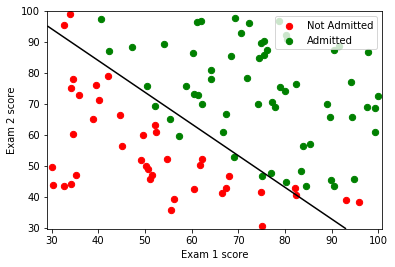

Theta found by sklearn:  [[-25.15293066   0.20616459   0.20140349]]


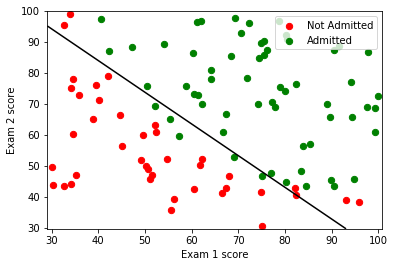

In [5]:
# plot the decision surface

plot_utils.plot_decision_boundary(X,y,theta_opt,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
plt.show()
#plt.savefig('fig2.pdf')

# Compare with sklearn logistic regression
# note the parameters fed into the LogisticRegression call

from sklearn import linear_model
sk_logreg = linear_model.LogisticRegression(C=1e5,solver='lbfgs',fit_intercept=False)
sk_logreg.fit(XX,y)
print "Theta found by sklearn: ", sk_logreg.coef_

plot_utils.plot_decision_boundary_sklearn(X,y,sk_logreg,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
plt.show()
#plt.savefig('fig2_sk.pdf')